In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df_fake = pd.read_csv(r"C:\Users\dell\Desktop\Fake.csv")
df_true = pd.read_csv(r"C:\Users\dell\Desktop\True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
print(df_true.shape)
print(df_fake.shape)

(21417, 4)
(23481, 4)


In [10]:
print(df_true.columns)
print(df_fake.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [11]:
df_fake.drop(['title','subject','date'],axis=1,inplace=True)

In [12]:
df_fake['class']=0
df_fake

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [13]:
df_true.drop(['title','subject','date'],axis=1,inplace=True)

In [14]:
df_true['class']=1
df_true

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [15]:
df = pd.concat([df_fake,df_true],axis=0)

In [16]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [17]:
# we shuffle the rows for the better train test
df=df.sample(frac=1)

In [18]:
df

,text,class
5236,WASHINGTON (Reuters) - The head of a congressi...,1
19566,Student government leaders at Loyola Universit...,0
17461,Barbra Streisand was an Obama sycophant and on...,0
15960,The lefty lunatic of the day just can t keep h...,0
967,There have been many reactions to Donald Trump...,0
...,...,...
18711,Police in Portland just moved from watching a ...,0
8069,Republican Senator Orrin Hatch tried to justif...,0
13280,"In NBC s attempt to discredit Trump, they ve s...",0
20664,SEOUL (Reuters) - North Korea has ratcheted up...,1


In [19]:
df.reset_index(inplace=True)
df.drop('index',axis=1)

,text,class
0,WASHINGTON (Reuters) - The head of a congressi...,1
1,Student government leaders at Loyola Universit...,0
2,Barbra Streisand was an Obama sycophant and on...,0
3,The lefty lunatic of the day just can t keep h...,0
4,There have been many reactions to Donald Trump...,0
...,...,...
44893,Police in Portland just moved from watching a ...,0
44894,Republican Senator Orrin Hatch tried to justif...,0
44895,"In NBC s attempt to discredit Trump, they ve s...",0
44896,SEOUL (Reuters) - North Korea has ratcheted up...,1


In [20]:
df.to_csv("new_dates")

In [21]:
df.shape

(44898, 3)

In [22]:
df.describe()

,index,class
count,44898.000000,44898.000000
mean,11247.720968,0.477015
std,6521.454073,0.499477
min,0.000000,0.000000
25%,5612.000000,0.000000
50%,11224.000000,0.000000
75%,16836.000000,1.000000
max,23480.000000,1.000000


# preprocessing  text data

In [23]:
import re
import string

In [24]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text


In [25]:
df['text']=df['text'].apply(wordopt)

In [26]:
df

,index,text,class
0,5236,washington reuters the head of a congressi...,1
1,19566,student government leaders at loyola universit...,0
2,17461,barbra streisand was an obama sycophant and on...,0
3,15960,the lefty lunatic of the day just can t keep h...,0
4,967,there have been many reactions to donald trump...,0
...,...,...,...
44893,18711,police in portland just moved from watching a ...,0
44894,8069,republican senator orrin hatch tried to justif...,0
44895,13280,in nbc s attempt to discredit trump they ve s...,0
44896,20664,seoul reuters north korea has ratcheted up...,1


# Data visualaization

In [27]:
!pip install wordcloud
from wordcloud import WordCloud


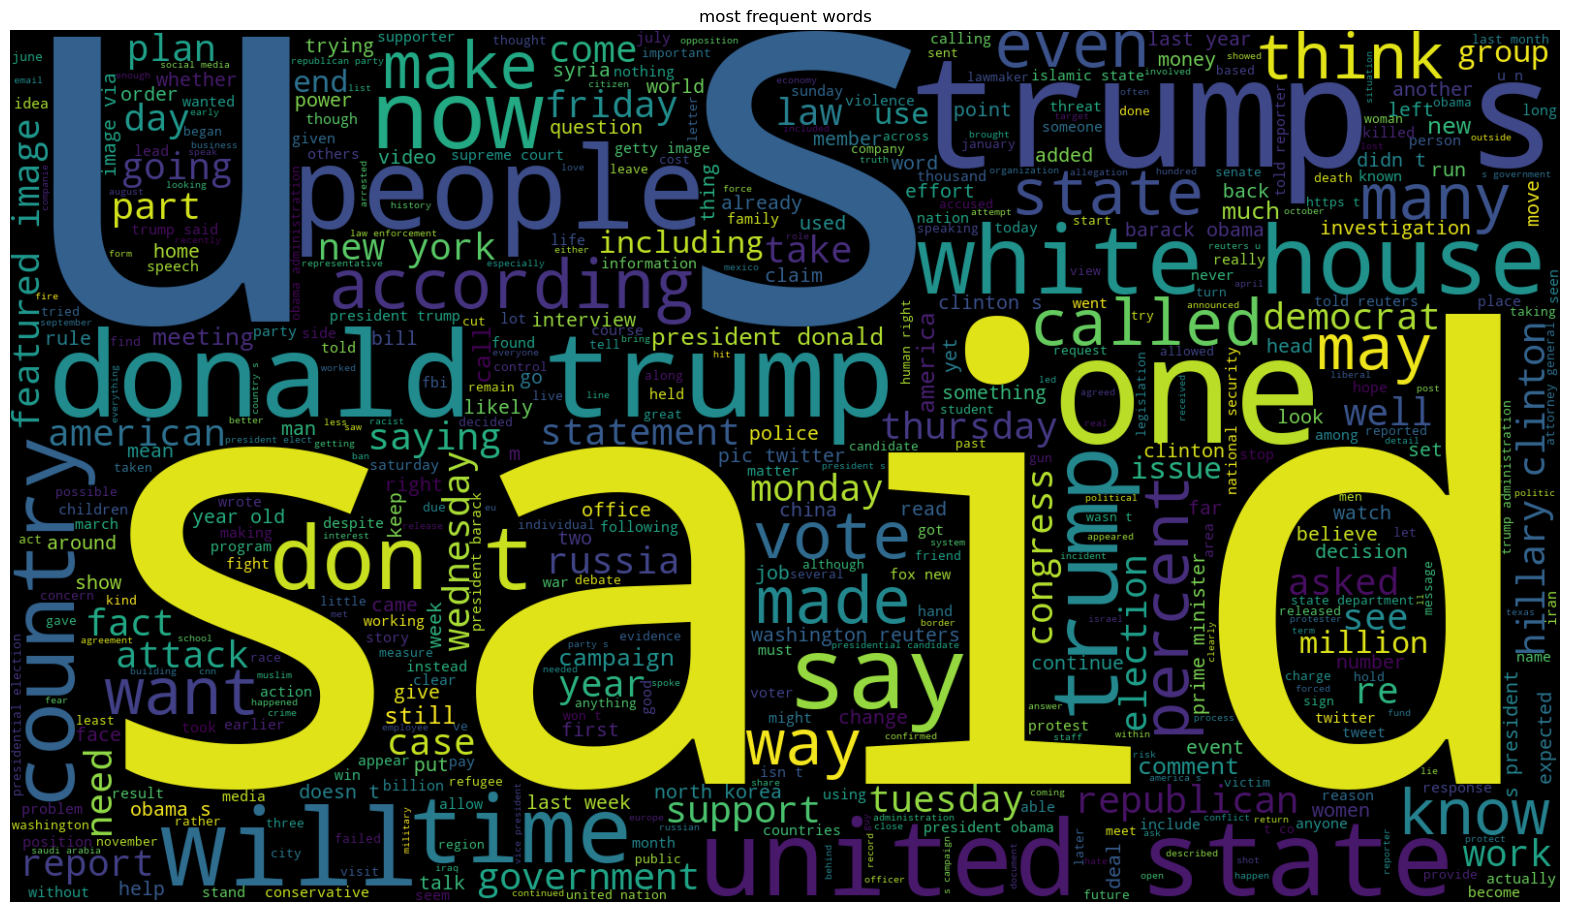

In [28]:
text = ' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
Wc = WordCloud(max_words=500,width=1600,height=900).generate(text)
plt.imshow(Wc,interpolation='bilinear')
plt.axis("off")
plt.title("most frequent words")
plt.show()


# Data splitting

In [29]:
x = df['text']
y = df['class']

In [30]:
x

0        washington  reuters    the head of a congressi...
1        student government leaders at loyola universit...
2        barbra streisand was an obama sycophant and on...
3        the lefty lunatic of the day just can t keep h...
4        there have been many reactions to donald trump...
                               ...                        
44893    police in portland just moved from watching a ...
44894    republican senator orrin hatch tried to justif...
44895    in nbc s attempt to discredit trump  they ve s...
44896    seoul  reuters    north korea has ratcheted up...
44897    washington  reuters    republican u s  congres...
Name: text, Length: 44898, dtype: object

In [31]:
y

0        1
1        0
2        0
3        0
4        0
        ..
44893    0
44894    0
44895    0
44896    1
44897    1
Name: class, Length: 44898, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33673,) (11225,) (33673,) (11225,)


# NLP

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [36]:
xv_train

<33673x95390 sparse matrix of type '<class 'numpy.float64'>'
	with 6892874 stored elements in Compressed Sparse Row format>

In [37]:
xv_test

<11225x95390 sparse matrix of type '<class 'numpy.float64'>'
	with 2298818 stored elements in Compressed Sparse Row format>

In [38]:
print(xv_test.shape)
print(xv_train.shape)

(11225, 95390)
(33673, 95390)


# model training

# Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
y_predlr = LR.predict(xv_test)

In [41]:
print(accuracy_score(y_test,y_predlr))

0.9851224944320712


In [42]:
LR_acc = LR.score(xv_test,y_predlr)
LR_acc

1.0

In [47]:
from sklearn.tree import DecisionTreeClassifier


# DECISION TREE

In [48]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [49]:
y_predDT = DT.predict(xv_test)

In [51]:
acc_score = accuracy_score(y_test,y_predDT)
acc_score

0.9951002227171493

# RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF =RandomForestClassifier()
RF.fit(xv_train,y_train)


RandomForestClassifier()

In [55]:
y_predRF = RF.predict(xv_test)

In [56]:
print("the acc score of rf is:", accuracy_score(y_test,y_predRF))

the acc score of rf is: 0.9866369710467706


# NAIVE BAYES

In [57]:
# GAUSSIAN

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [89]:
GNB.fit(xv_train,y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [63]:
# multinomial


from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [64]:
MNB.fit(xv_train,y_train)

MultinomialNB()

In [68]:
y_predMNB =MNB.predict(xv_test)

In [69]:
print("the acc score is :", accuracy_score(y_test,y_predMNB))

the acc score is : 0.9379064587973274


In [70]:
# bernoulli

from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

In [72]:
BNB.fit(xv_train,y_train)
y_predBNB = BNB.predict(xv_test)

In [73]:
print("the acc score:", accuracy_score(y_test,y_predBNB))

the acc score: 0.9423608017817372


# BOOSTING MODELS

In [74]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()

In [75]:
ABC.fit(xv_train,y_train)

AdaBoostClassifier()

In [76]:
y_predABC = ABC.predict(xv_test)

In [77]:
print("the acc score is:", accuracy_score(y_test,y_predABC))

the acc score is: 0.9953674832962138


In [78]:
# GRADIENTBOOSTING

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [79]:
GBC.fit(xv_train,y_train)
y_predGBC = GBC.predict(xv_test)

In [80]:
print("the acc score is:", accuracy_score(y_test,y_predGBC))

the acc score is: 0.9942093541202672


In [81]:
# xgboost

!pip install xgboost

In [82]:
from xgboost import XGBClassifier
XGB =XGBClassifier()

In [83]:
XGB.fit(xv_train,y_train)
y_predXGB = XGB.predict(xv_test)

In [93]:
print("the acc score is:", round(accuracy_score(y_test,y_predXGB)*100,2))

the acc score is: 99.7


# performnace analysis

In [91]:
pt = []

for i in [LR,DT,RF,MNB,BNB,ABC,GBC,XGB]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
print(pt)

[98.51, 99.44, 98.76, 93.79, 94.24, 99.54, 99.42, 99.7]


# conclusion 

From the above algorithms used for modelling the dataset, XGboost gives the best accuracy with accuracy score 99.70 %.

In [109]:
# example text
example = ["i think the whole world is on fire"]
# vectorization
example_vectorized = vectorization.transform(example)
# make prediction using best model thats XGBoost
result = XGB.predict(example_vectorized)

print(result)

if (result==0):
    print("fake_news")
else:
    print("true_news")

[0]
fake_news


In [102]:
df.head()

,index,text,class
0,5236,washington reuters the head of a congressi...,1
1,19566,student government leaders at loyola universit...,0
2,17461,barbra streisand was an obama sycophant and on...,0
3,15960,the lefty lunatic of the day just can t keep h...,0
4,967,there have been many reactions to donald trump...,0


In [110]:
# example text
example = ["washington reuters the head of a congressi"]
# vectorization
example_vectorized = vectorization.transform(example)
# make prediction using best model thats XGBoost
result = XGB.predict(example_vectorized)

print(result)

if (result==0):
    print("fake_news")
else:
    print("true_news")

[1]
true_news
